<a href="https://colab.research.google.com/github/Hatsuhinode/Feature-Engineering/blob/main/Handling_categorical_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 58.2MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# Handling categorical missing values

In [ ]:
hPriceDataframe = pd.read_csv('train.csv')
hPriceDataframe.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [ ]:
hPriceDataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
hPriceDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.set_option('display.max_rows', 81)
hPriceDataframe.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

---

In [ ]:
hPriceDataframe['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
hPriceDataframe['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [ ]:
hPriceDataframe['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
hPriceDataframe['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

---

In [ ]:
houseDf = pd.read_csv('train.csv', usecols = ['Id','GarageType','GarageQual','BsmtQual','FireplaceQu','SalePrice'])
houseDf.head(6)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice
0,1,Gd,NaN,Attchd,TA,208500
1,2,Gd,TA,Attchd,TA,181500
2,3,Gd,TA,Attchd,TA,223500
3,4,TA,Gd,Detchd,TA,140000
4,5,Gd,TA,Attchd,TA,250000
5,6,Gd,NaN,Attchd,TA,143000


In [ ]:
houseDf.shape

(1460, 6)

In [ ]:
houseDf.isnull().sum()

Id               0
BsmtQual        37
FireplaceQu    690
GarageType      81
GarageQual      81
SalePrice        0
dtype: int64

In [ ]:
(houseDf.isnull().mean())*100

Id              0.000000
BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

---

# Replacing with most frequent category

When missingness in categorical data occurs completely at random (MCAR) or the **missing values represent a small proportion of the total data**(for **preserving distribution**), imputing with the mode can be appropriate.

Mode imputation works well when the **most frequent category captures the general trend or represents the majority of the dataset**. It helps in preserving the overall distribution of the categorical variable.

When dealing with categorical features that have a **relatively small number of unique categories**, imputing with the mode might not distort the representation of the feature.

### BsmtQual

In [ ]:
houseDf.groupby(['BsmtQual'])

In [ ]:
houseDf.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [ ]:
#houseDf['BsmtQual'].value_counts()

### Graphical representation of frequency of categories

#### BsmtQual

In [ ]:
#houseDf.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar();

In [ ]:
# houseDf['BsmtQual'].value_counts(ascending=False).plot.bar()

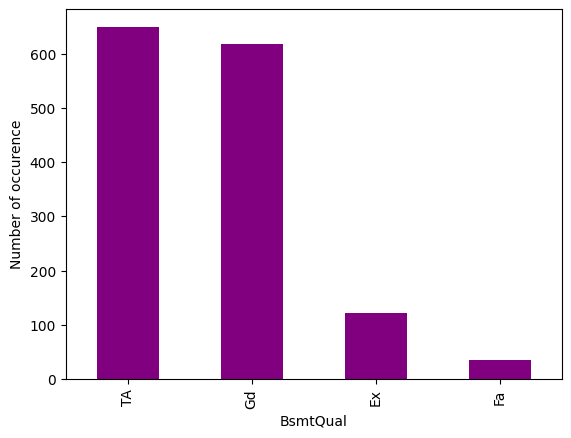

In [ ]:
plt.ylabel('Number of occurence')
houseDf.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar(color='purple');

###GarageType

In [ ]:
houseDf['GarageType'].value_counts()

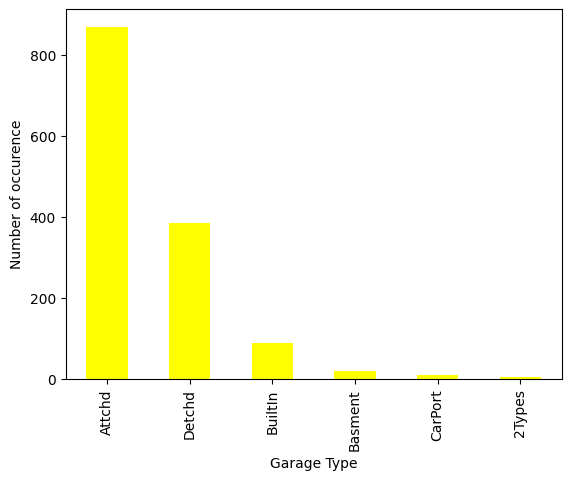

In [ ]:
plt.ylabel('Number of occurence')
plt.xlabel('Garage Type')
houseDf['GarageType'].value_counts(ascending=False).plot.bar(color='yellow');

###GarageQual

In [ ]:
houseDf['GarageQual'].value_counts()

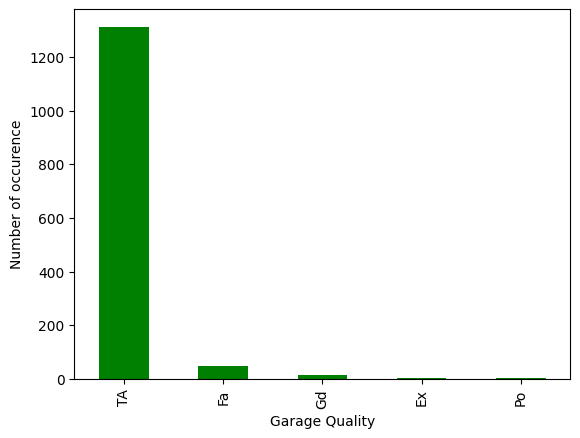

In [ ]:
plt.ylabel('Number of occurence')
plt.xlabel('Garage Quality')
houseDf['GarageQual'].value_counts(ascending=False).plot.bar(color='green');

### FireplaceQu

In [ ]:
houseDf['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

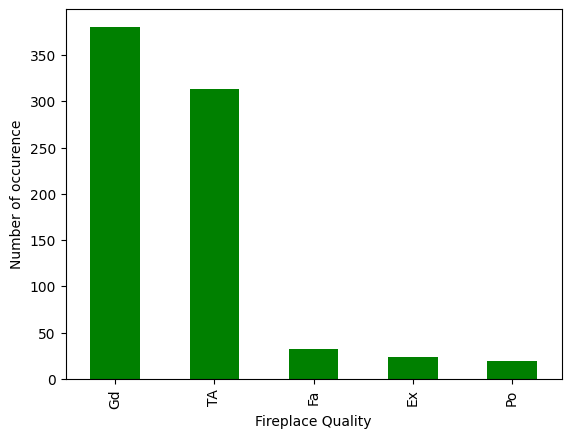

In [ ]:
plt.ylabel('Number of occurence')
plt.xlabel('Fireplace Quality')
houseDf['FireplaceQu'].value_counts(ascending=False).plot.bar(color='green');

# Mode Imputation

---

In [ ]:
houseDf['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
type(houseDf['BsmtQual'].value_counts())

pandas.core.series.Series

In [ ]:
houseDf['BsmtQual'].value_counts()[0]

649

In [ ]:
houseDf['BsmtQual'].value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

In [ ]:
houseDf['BsmtQual'].value_counts().index[0]

'TA'

---

In [ ]:
houseDf['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [ ]:
houseDf['BsmtQual'].mode()[0]

'TA'

---

In [ ]:
def Imputation(dataframe, feature):
    modeCategory = dataframe[feature].mode()[0]
    dataframe[feature + 'ModeCatagoryReplacement'] = dataframe[feature].fillna(modeCategory)

In [ ]:
categoricalFeatures = ['BsmtQual', 'GarageType', 'GarageQual', 'FireplaceQu']

for feature in categoricalFeatures :
    Imputation(houseDf, feature)

In [ ]:
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice,BsmtQualModeCatagoryReplacement,GarageTypeModeCatagoryReplacement,GarageQualModeCatagoryReplacement,FireplaceQuModeCatagoryReplacement
0,1,Gd,NaN,Attchd,TA,208500,Gd,Attchd,TA,Gd
1,2,Gd,TA,Attchd,TA,181500,Gd,Attchd,TA,TA
2,3,Gd,TA,Attchd,TA,223500,Gd,Attchd,TA,TA
3,4,TA,Gd,Detchd,TA,140000,TA,Detchd,TA,Gd


In [ ]:
houseDf.isnull().sum()

Id                                      0
BsmtQual                               37
FireplaceQu                           690
GarageType                             81
GarageQual                             81
SalePrice                               0
BsmtQualModeCatagoryReplacement         0
GarageTypeModeCatagoryReplacement       0
GarageQualModeCatagoryReplacement       0
FireplaceQuModeCatagoryReplacement      0
dtype: int64

---

# Graphical representation of data occurence before and after imputation

### Count plot

#### BsmtQual and BsmtQualModeCatagoryReplacement

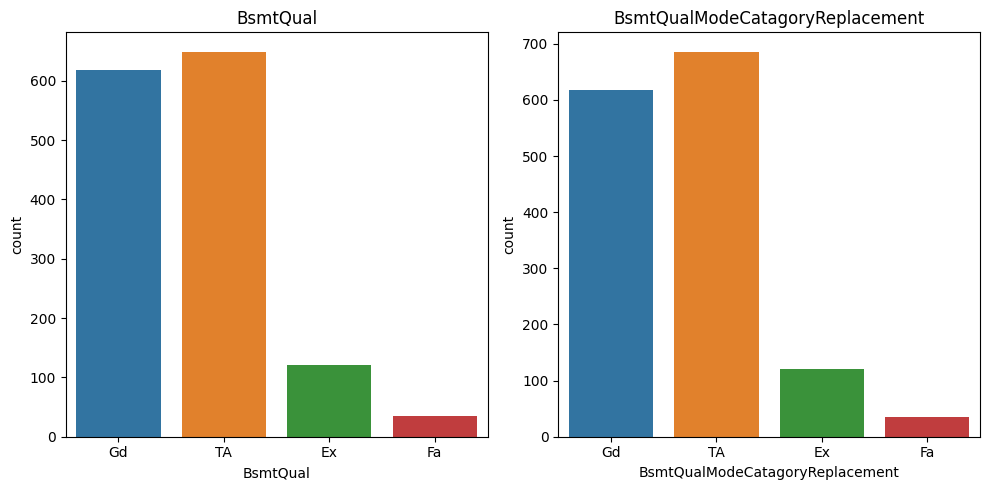

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=houseDf, x='BsmtQual', ax=axes[0])
axes[0].set_title('BsmtQual')

sns.countplot(data=houseDf, x='BsmtQualModeCatagoryReplacement', ax=axes[1])
axes[1].set_title('BsmtQualModeCatagoryReplacement')

plt.tight_layout()
plt.show()

plt.tight_layout() Adjusts spacing between subplots for better visibility

####GarageType and GarageTypeModeCatagoryReplacement

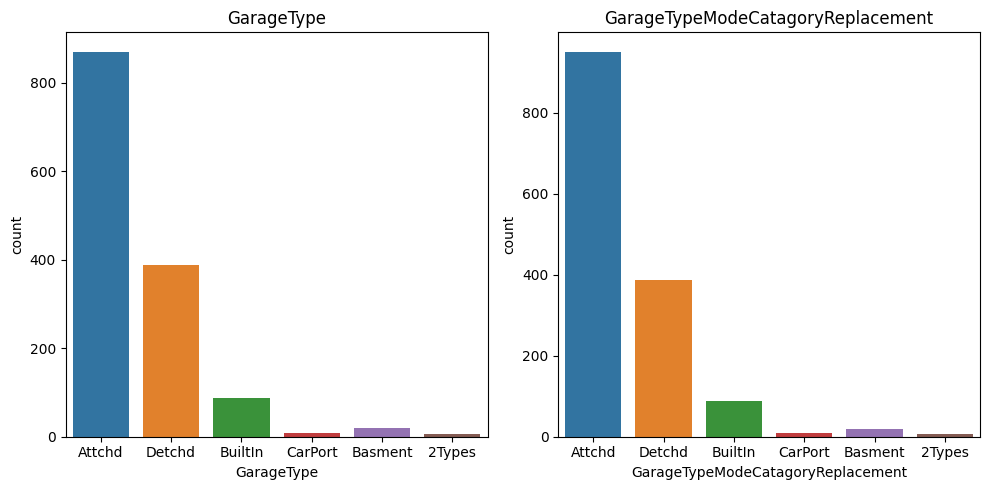

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=houseDf, x='GarageType', ax=axes[0])
axes[0].set_title('GarageType')

sns.countplot(data=houseDf, x='GarageTypeModeCatagoryReplacement', ax=axes[1])
axes[1].set_title('GarageTypeModeCatagoryReplacement')

plt.tight_layout()
plt.show()

####GarageQual and GarageQualModeCatagoryReplacement

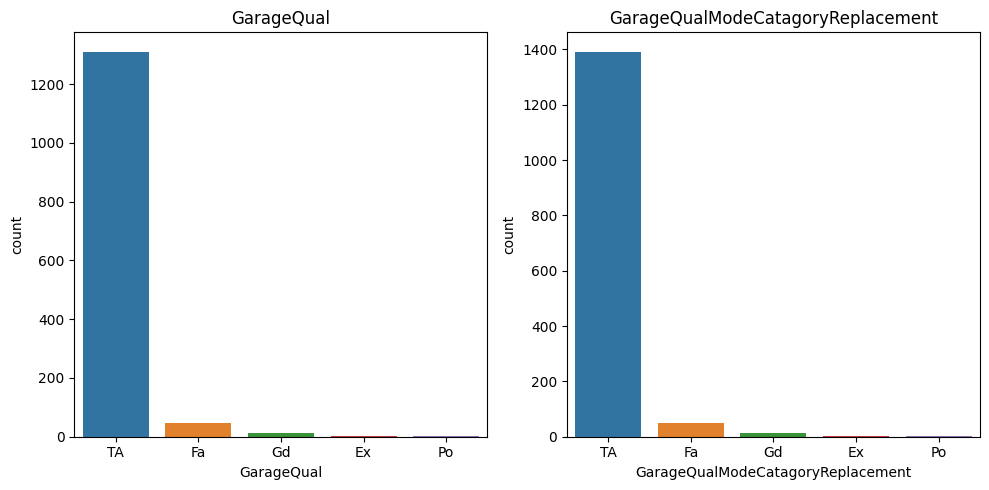

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=houseDf, x='GarageQual', ax=axes[0])
axes[0].set_title('GarageQual')

sns.countplot(data=houseDf, x='GarageQualModeCatagoryReplacement', ax=axes[1])
axes[1].set_title('GarageQualModeCatagoryReplacement')

plt.tight_layout()
plt.show()

####FireplaceQu and FireplaceQuModeCatagoryReplacement

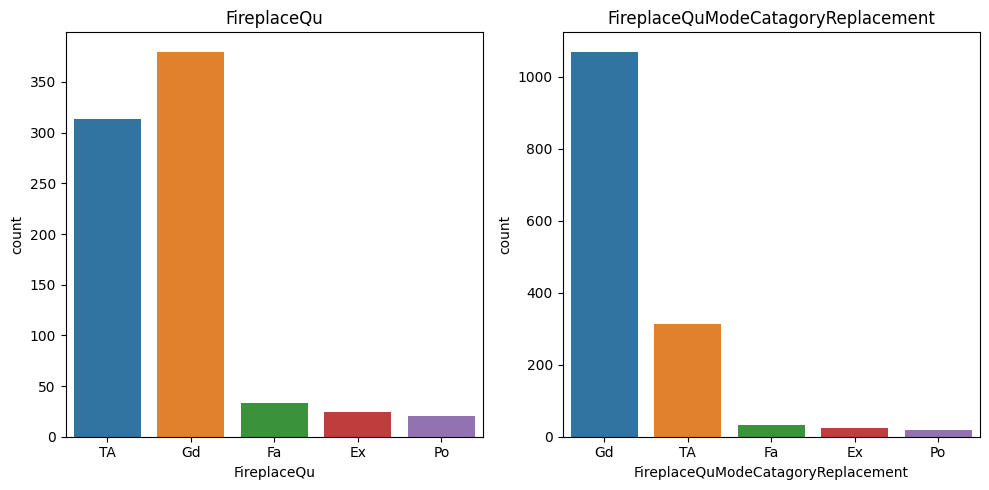

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(data=houseDf, x='FireplaceQu', ax=axes[0])
axes[0].set_title('FireplaceQu')

sns.countplot(data=houseDf, x='FireplaceQuModeCatagoryReplacement', ax=axes[1])
axes[1].set_title('FireplaceQuModeCatagoryReplacement')

plt.tight_layout()
plt.show()

---

# Variable to capture NaN

In [ ]:
houseDf = pd.read_csv('train.csv', usecols = ['Id','GarageType','GarageQual','BsmtQual','FireplaceQu','SalePrice'])
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice
0,1,Gd,NaN,Attchd,TA,208500
1,2,Gd,TA,Attchd,TA,181500
2,3,Gd,TA,Attchd,TA,223500
3,4,TA,Gd,Detchd,TA,140000


---

####FireplaceQu

In [ ]:
houseDf['FireplaceQuVariable'] = np.where(houseDf['FireplaceQu'].isnull(),1,0)

In [ ]:
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice,FireplaceQuVariable
0,1,Gd,NaN,Attchd,TA,208500,1
1,2,Gd,TA,Attchd,TA,181500,0
2,3,Gd,TA,Attchd,TA,223500,0
3,4,TA,Gd,Detchd,TA,140000,0


In [ ]:
houseDf['FireplaceQu'].fillna(houseDf['FireplaceQu'].mode()[0])

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

In [ ]:
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice,FireplaceQuVariable
0,1,Gd,NaN,Attchd,TA,208500,1
1,2,Gd,TA,Attchd,TA,181500,0
2,3,Gd,TA,Attchd,TA,223500,0
3,4,TA,Gd,Detchd,TA,140000,0


In [ ]:
houseDf['FireplaceQu'].fillna(houseDf['FireplaceQu'].mode()[0],inplace = True)

In [ ]:
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice,FireplaceQuVariable
0,1,Gd,Gd,Attchd,TA,208500,1
1,2,Gd,TA,Attchd,TA,181500,0
2,3,Gd,TA,Attchd,TA,223500,0
3,4,TA,Gd,Detchd,TA,140000,0


---

# Replacing NaN with new category

In [ ]:
houseDf = pd.read_csv('train.csv', usecols = ['Id','GarageType','GarageQual','BsmtQual','FireplaceQu','SalePrice'])
houseDf.head(4)

---

In [ ]:
def newCatImputation(dataframe, feature) :
    dataframe[feature + 'NewCategory'] = np.where(dataframe[feature].isnull(),"ValueMissing",dataframe[feature])

In [ ]:
categoricalFeatures = ['BsmtQual', 'GarageType', 'GarageQual', 'FireplaceQu']

for feature in categoricalFeatures :
    newCatImputation(houseDf, feature)

In [ ]:
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice,BsmtQualNewCategory,GarageTypeNewCategory,GarageQualNewCategory,FireplaceQuNewCategory
0,1,Gd,NaN,Attchd,TA,208500,Gd,Attchd,TA,ValueMissing
1,2,Gd,TA,Attchd,TA,181500,Gd,Attchd,TA,TA
2,3,Gd,TA,Attchd,TA,223500,Gd,Attchd,TA,TA
3,4,TA,Gd,Detchd,TA,140000,TA,Detchd,TA,Gd


In [ ]:
houseDf.drop(['BsmtQual', 'GarageType', 'GarageQual', 'FireplaceQu'], axis = 1)
houseDf.head(4)

,Id,BsmtQual,FireplaceQu,GarageType,GarageQual,SalePrice,BsmtQualNewCategory,GarageTypeNewCategory,GarageQualNewCategory,FireplaceQuNewCategory
0,1,Gd,NaN,Attchd,TA,208500,Gd,Attchd,TA,ValueMissing
1,2,Gd,TA,Attchd,TA,181500,Gd,Attchd,TA,TA
2,3,Gd,TA,Attchd,TA,223500,Gd,Attchd,TA,TA
3,4,TA,Gd,Detchd,TA,140000,TA,Detchd,TA,Gd


---